In [126]:
# All libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## Importing the "Leads Dataset"

In [127]:
# Read the dataset
leads = pd.read_csv("Leads.csv")

In [128]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [129]:
#Checking the Shape of dataset
leads.shape

(9240, 37)

In [130]:
# checking columns in the data set
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [131]:
# Checking the summary of numerical rows in the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [132]:
# Check for non null values in each columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### we can see that there are many null values present in the data set, it should be treated. There are many categorical variables as well for which we need to create dummy variables.

## Step 1: Data Cleaning

### As mentioned , there are 'select' values in many columns, which is nothing but null values, converting 'select' to nan

In [133]:

# Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

In [134]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [135]:
# Finding the null percentages across columns
(round(leads.isnull().sum()/len(leads.index),2)*100).sort_values(ascending=False)

How did you hear about X Education               78.0
Lead Profile                                     74.0
Lead Quality                                     52.0
Asymmetrique Profile Score                       46.0
Asymmetrique Activity Score                      46.0
Asymmetrique Profile Index                       46.0
Asymmetrique Activity Index                      46.0
City                                             40.0
Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
Last Activity                                     1.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Receive More Updates About Our Courses            0.0
I agree to pay the amount through cheque          0.0
Get updates on DM Content   

## Dropping cloumns with more than 40% missing values and imputing other columns which has missing values with suitable method

In [136]:
# dropping the columns with null values more than 40% .
leads=leads.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [137]:
# Finding the null percentages across columns after removing the above columns
(round(leads.isnull().sum()/len(leads.index),2)*100).sort_values(ascending=False)

City                                             40.0
Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Last Activity                                     1.0
Through Recommendations                           0.0
Receive More Updates About Our Courses            0.0
Prospect ID                                       0.0
Newspaper                                         0.0
Update me on Supply Chain Content                 0.0
Get updates on DM Content                         0.0
I agree to pay the amount through cheque          0.0
A free copy of Mastering The Interview            0.0
Digital Advertisement                             0.0
Search                      

#### Column: City

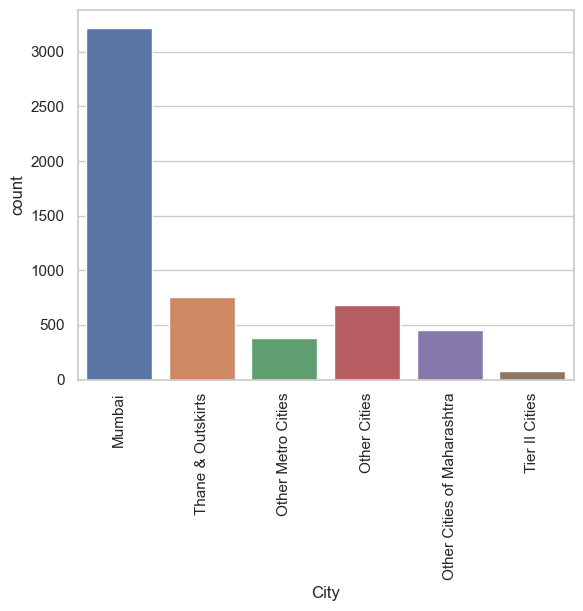

In [138]:
sns.countplot(leads["City"])
plt.xticks(rotation=90)
plt.show()

#### Mumbai has the highest count so we can impute missing values with Mumbai

In [139]:
# Imputing the missing data in the 'City' column with 'Mumbai'
leads['City']=leads['City'].replace(np.nan,'Mumbai')

### Column : specialization

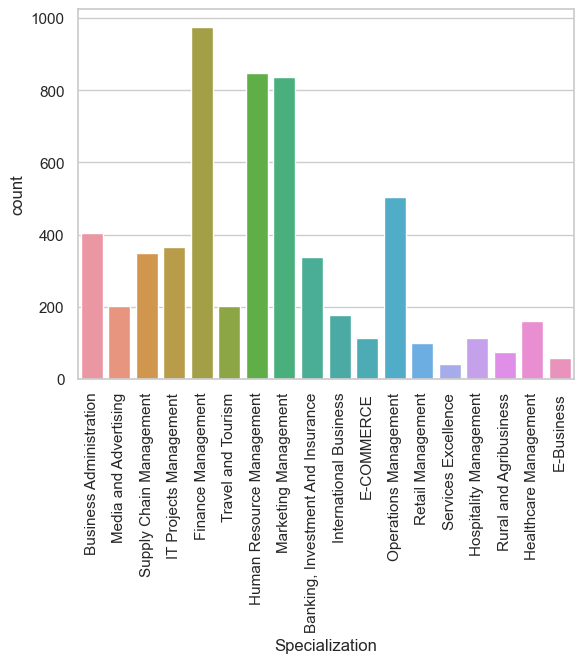

In [140]:
sns.countplot(leads['Specialization'])
plt.xticks(rotation=90)
plt.show()

#### Since There is 37% missing values present in the Specialization,we can create a another category 'Others' for this.

In [141]:
# Creating a separate category called 'Others' for missing values in specialization column
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

### Column: Tags

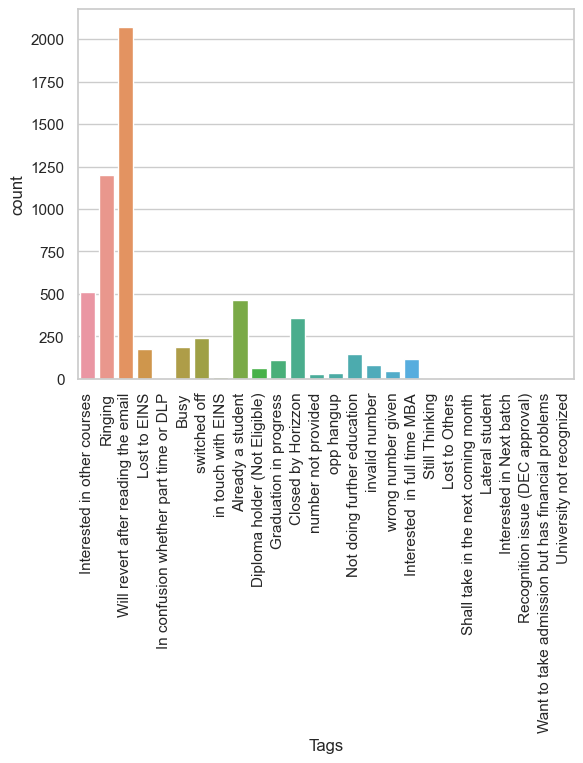

In [142]:
sns.countplot(leads['Tags'])
plt.xticks(rotation=90)
plt.show()

#### replacing missing values with "will revert after reading the email"

In [143]:
leads['Tags']=leads['Tags'].replace(np.nan,'Will revert after reading the email')

### Column: What matters most to you in choosing a course

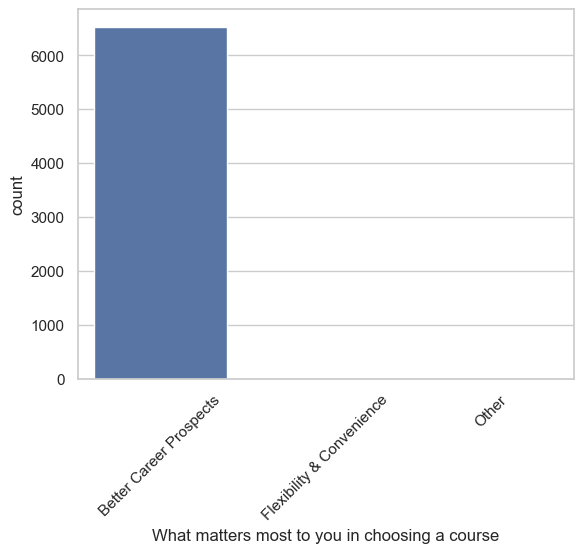

In [144]:
sns.countplot(leads['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()

In [145]:
# we can Drop this column 
leads=leads.drop('What matters most to you in choosing a course',axis=1)

### Column : What is your current occupation

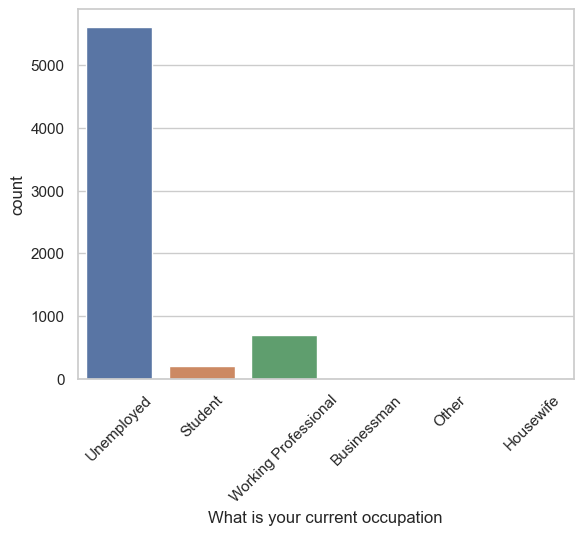

In [146]:
sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [147]:
# Imputing the missing values in the 'What is your current occupation' column with 'Unemployed'
leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan,'Unemployed')

### Column: Country

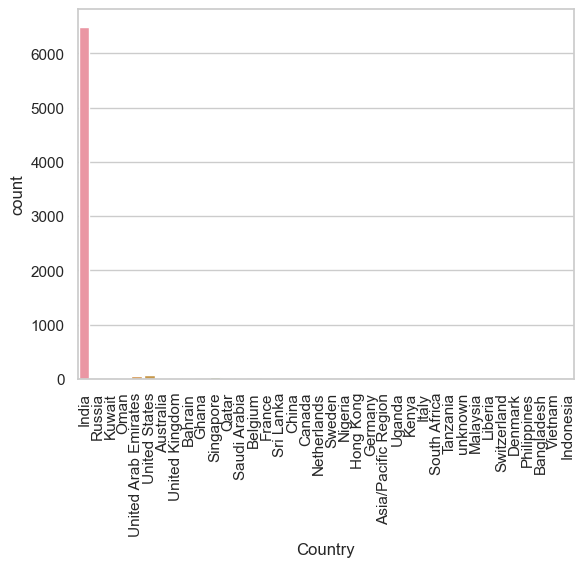

In [148]:
sns.countplot(leads['Country'])
plt.xticks(rotation=90)
plt.show()

In [149]:
# Imputing the missing data in the 'Country' column with 'India'
leads['Country']=leads['Country'].replace(np.nan,'India')

In [150]:
# Finding the null percentages across columns
(round(leads.isnull().sum()/len(leads.index),2)*100).sort_values(ascending=False)

TotalVisits                                 1.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Prospect ID                                 0.0
Newspaper Article                           0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Search                                      0.0
Magazine                                    0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                          

In [151]:
# Dropping the rows with null values
leads.dropna(inplace = True)

In [152]:
# Finding the null percentages across columns
(round(leads.isnull().sum()/len(leads.index),2)*100)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

### Now we don't have any missing value in the dataset.

# Univariate and Bivariate Analysis

### a. Lead Origin

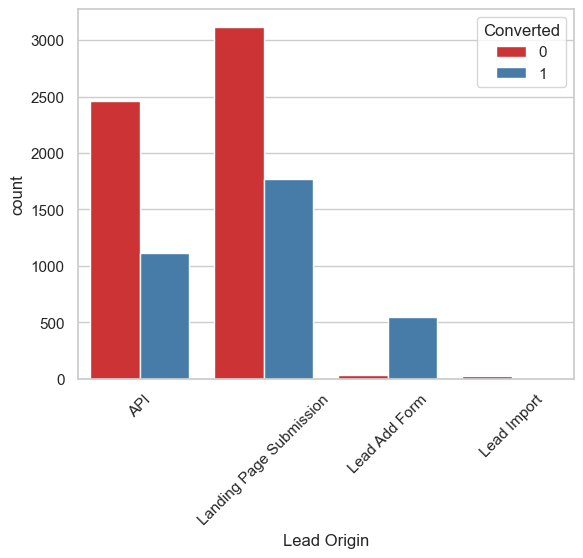

In [153]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation=45)
plt.show()

Inference:<br>
    -API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.<br>
    -Lead Add Form has more than 90% conversion rate but count of lead are not very high.<br>
    -Lead Import are very less in count.

### b. Lead Source

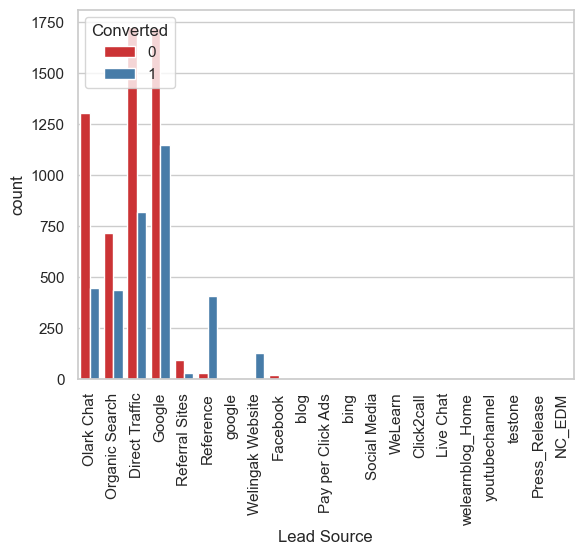

In [154]:
sns.countplot(x = "Lead Source", hue = "Converted", data = leads, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Here "Google" and "google" is present separately so have to convert to single term

In [155]:
# replacing 'google' with 'Google'
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [156]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

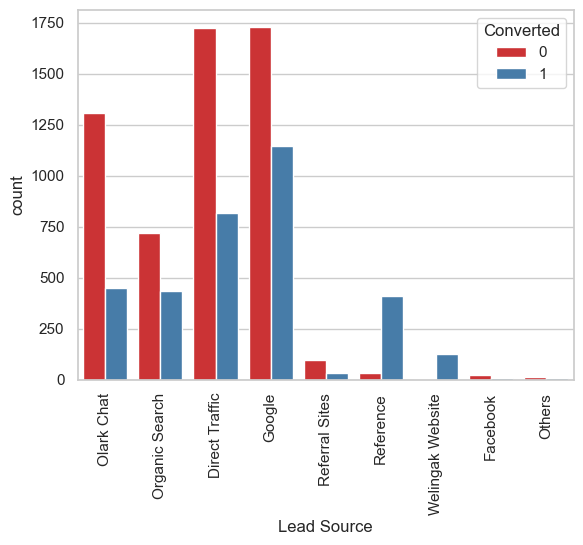

In [157]:
# Visualizing again
sns.countplot(x = "Lead Source", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference: <br>
   -Google and Direct traffic generates maximum number of leads.<br>
   -Conversion Rate of reference leads and leads through welingak website is high.

### c. Do not Email

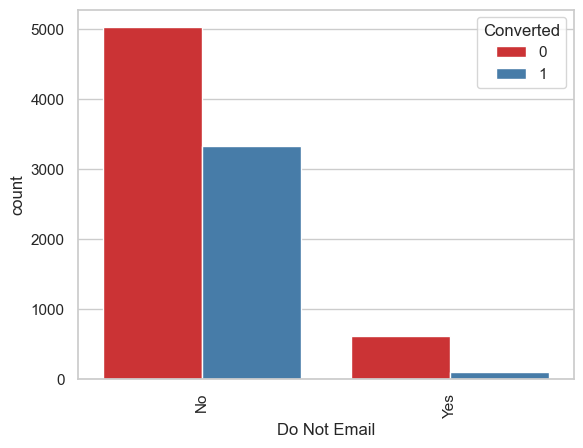

In [158]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

 inference:<br>
    -most of the entries are No

### d. Do not Call

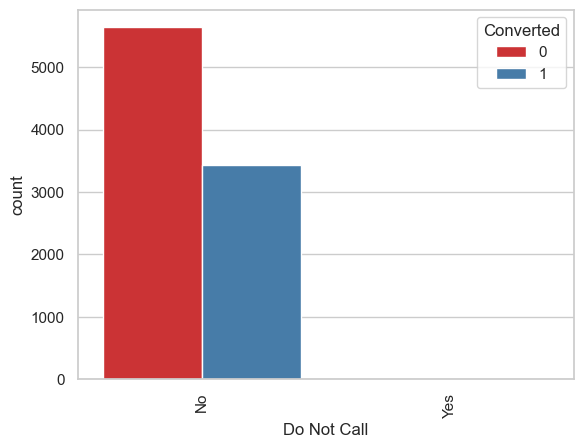

In [159]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### e. Total Visits

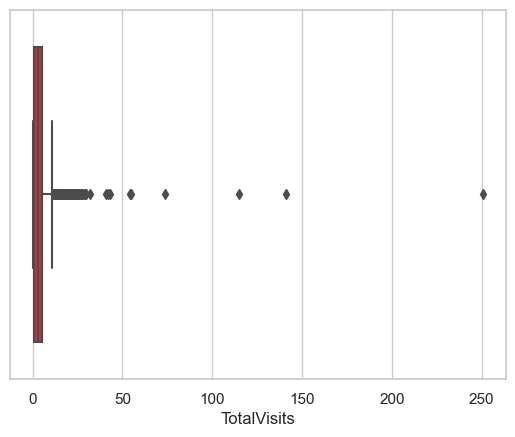

In [160]:
sns.boxplot(leads['TotalVisits'],orient='vert',palette='Set1')
plt.show()

In [161]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

There are outliers we can cap it to 95% or total visits=10.00

In [162]:
leads=leads[leads['TotalVisits']<=10.0]

<AxesSubplot:xlabel='TotalVisits'>

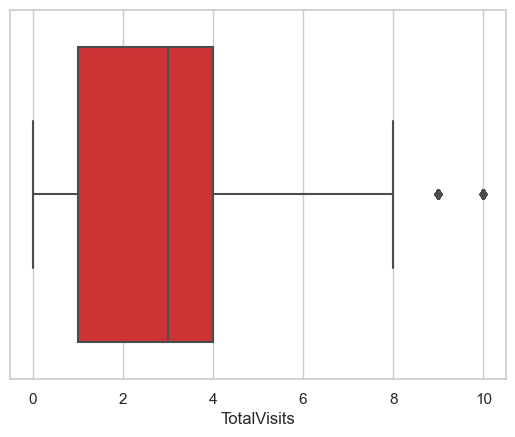

In [163]:
sns.boxplot(leads["TotalVisits"],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

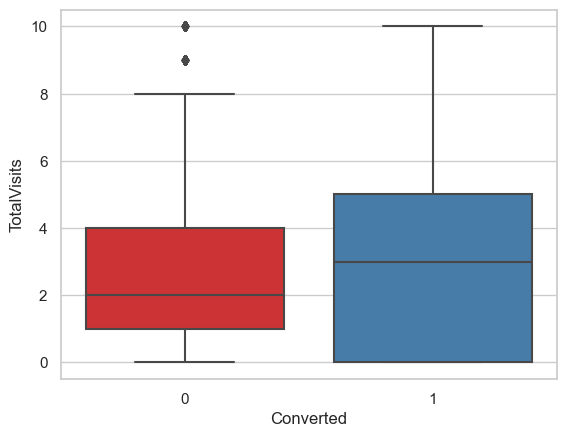

In [164]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads,palette='Set1')

### f. Total Time Spent On Website

In [165]:
leads['Total Time Spent on Website'].describe()

count    8721.000000
mean      473.146887
std       542.265343
min         0.000000
25%         2.000000
50%       236.000000
75%       899.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

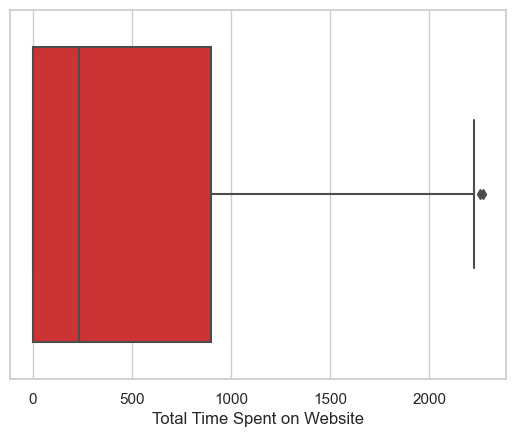

In [166]:
sns.boxplot(leads['Total Time Spent on Website'],orient='vert',palette='Set1')
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

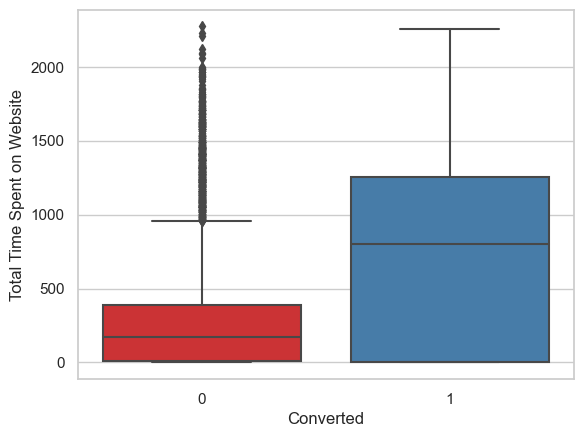

In [167]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads,palette='Set1')

Inference:<br>
   -Leads who are spending more time on the website are more likely to be converted.

### g. Page Views Per Visit

In [168]:
leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8721.000000
mean        2.255668
std         1.922397
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

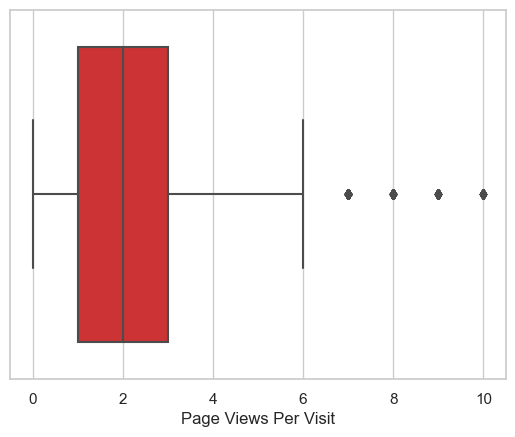

In [169]:
sns.boxplot(leads['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()

There are outliers we can cap it to 95% or Page Views Per Visit<=6.00

In [170]:
leads=leads[leads['Page Views Per Visit']<=6.0]

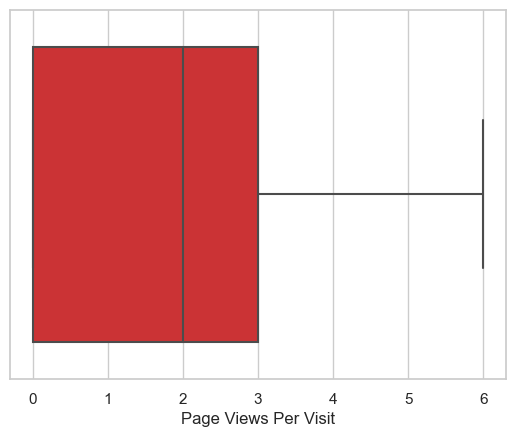

In [171]:
sns.boxplot(leads['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()

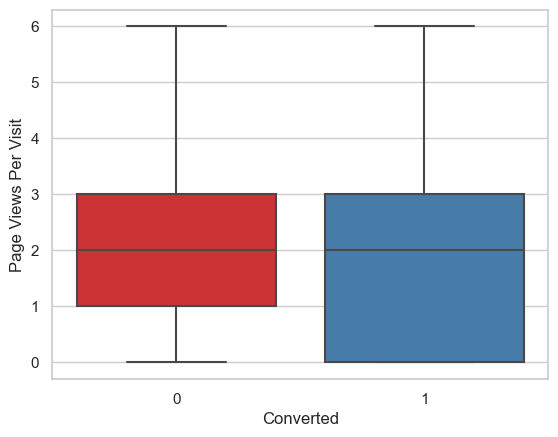

In [172]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =leads,palette='Set1')
plt.show()

### h. Last Activity

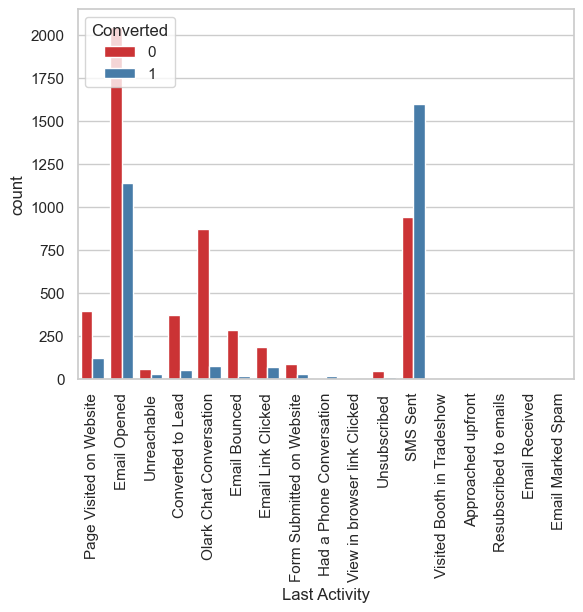

In [173]:
sns.countplot(x = "Last Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

will replace the Last Activities which are having less data to other activities

In [174]:
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

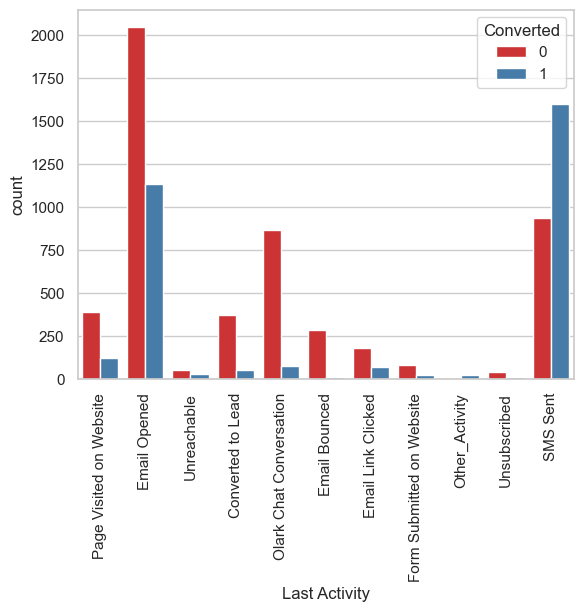

In [175]:
# Visualizing after replacing
sns.countplot(x = "Last Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference :<br>
    -Most of the lead have their Email opened as their last activity.<br>
    -Conversion rate for leads with last activity as SMS Sent is almost 60%.

### i. Country

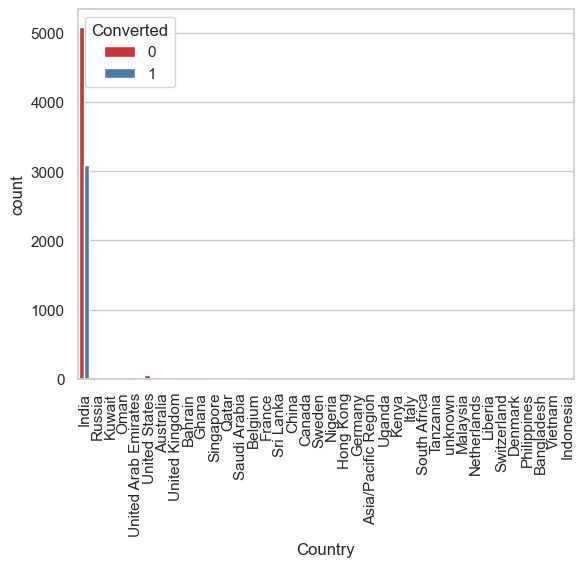

In [176]:
sns.countplot(x = "Country", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### j. Specialization

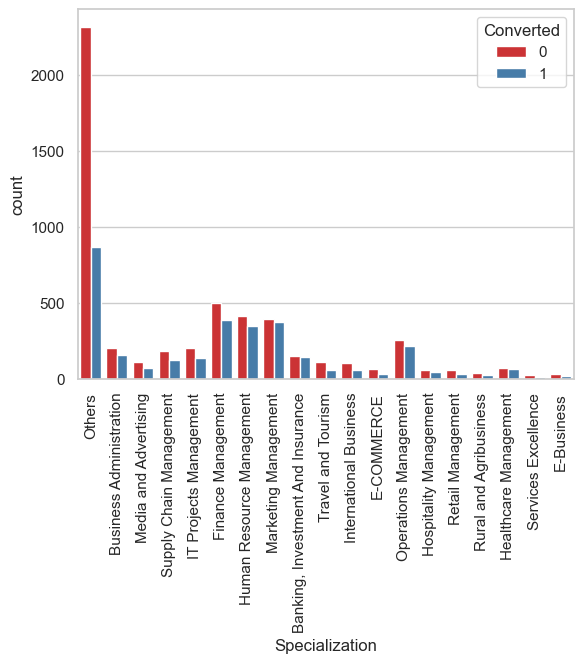

In [177]:
sns.countplot(x = "Specialization", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### k.What is your current occupation

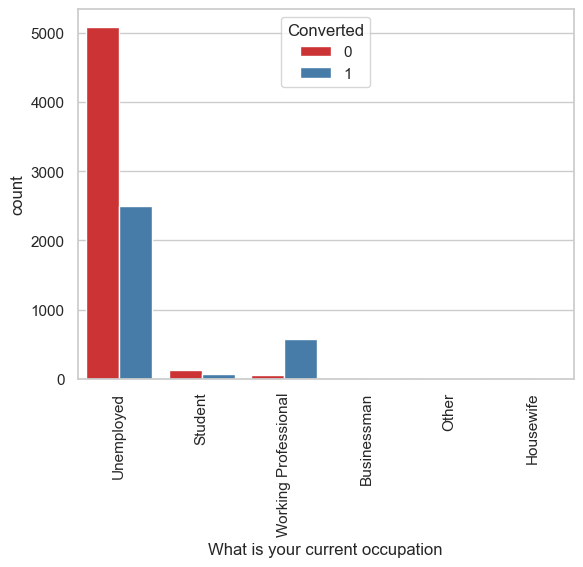

In [178]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference:<br>
   -Working Professionals going for the course have high chances of joining it.<br>
   -Unemployed leads are the most in numbers but has around 30-35% conversion rate.

### l. Search

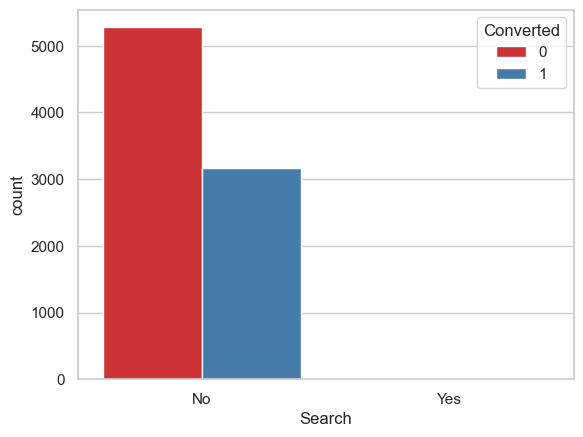

In [179]:
sns.countplot(x = "Search", hue = "Converted", data = leads,palette='Set1')
plt.show()

### m. Magazine

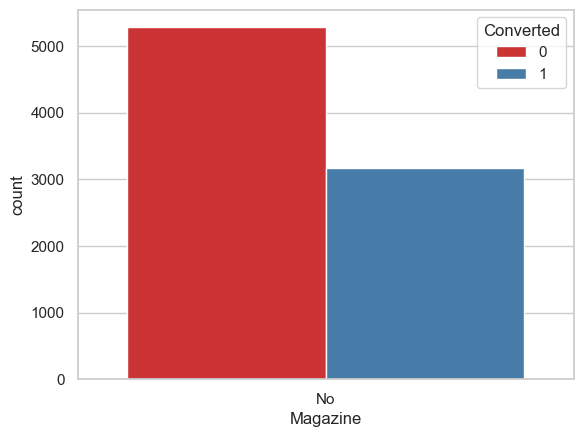

In [180]:
sns.countplot(x = "Magazine", hue = "Converted", data = leads,palette='Set1')
plt.show()

### n.Newspaper Article

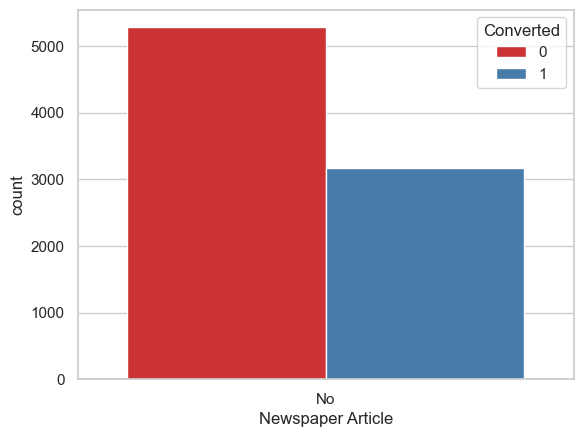

In [181]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads,palette='Set1')
plt.show()

### o.X Education Forums

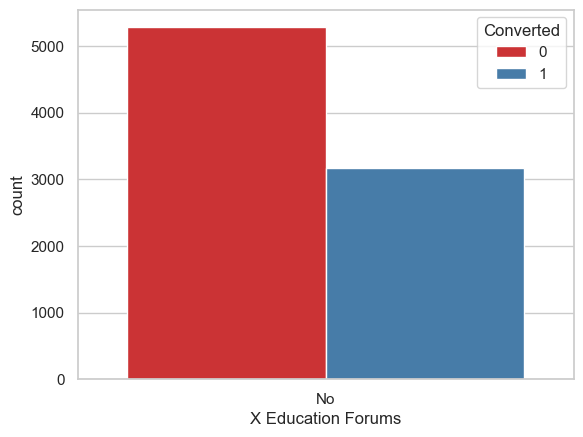

In [182]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads,palette='Set1')
plt.show()

### p.Newspaper

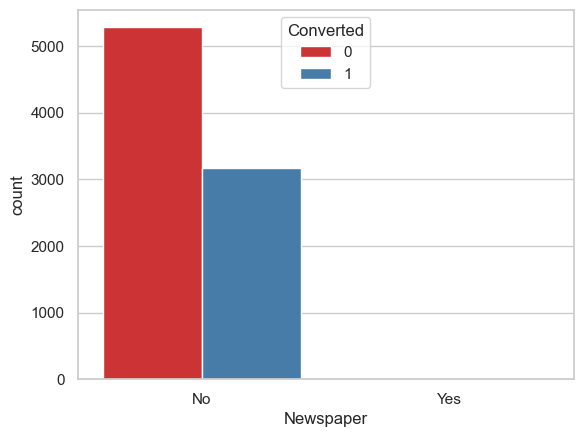

In [183]:
sns.countplot(x = "Newspaper", hue = "Converted", data = leads,palette='Set1')
plt.show()

### q. Digital Advertisement

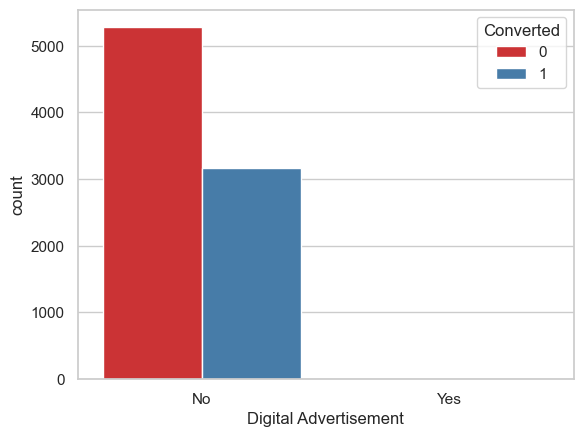

In [184]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads,palette='Set1')
plt.show()

### r. Through Recommendations

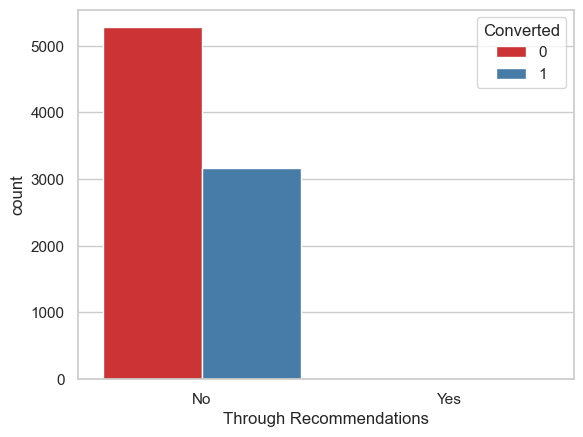

In [185]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads,palette='Set1')
plt.show()

### s.Receive More Updates About Our Courses

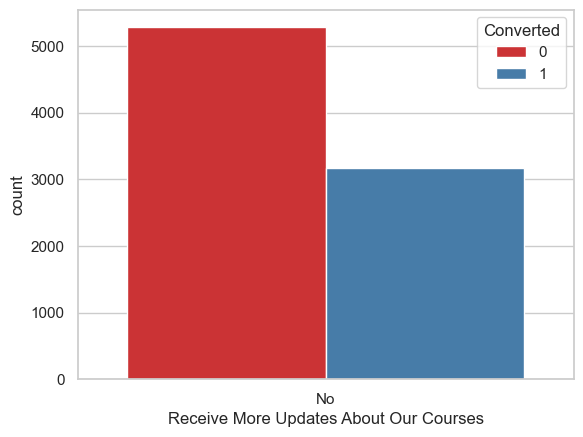

In [186]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads,palette='Set1')
plt.show()

### t. Tags

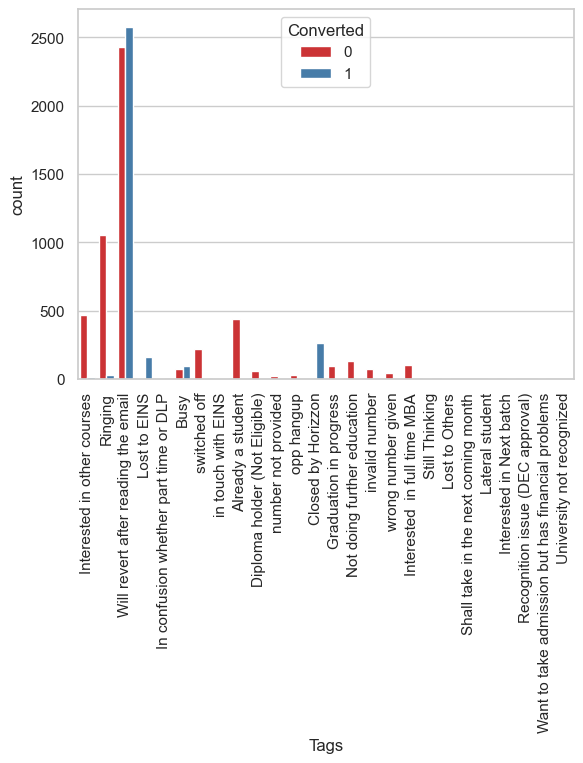

In [187]:
sns.countplot(x = "Tags", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### u. Update me on Supply Chain Content

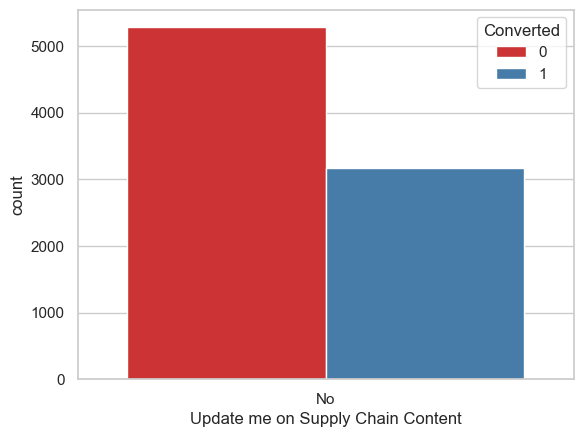

In [188]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = leads,palette='Set1')
plt.show()

### v. Get updates on DM Content

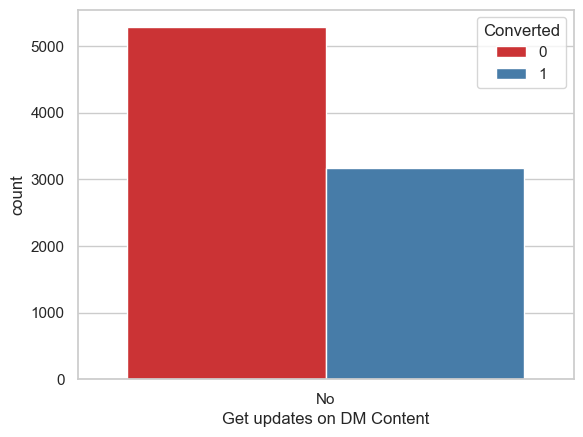

In [189]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads,palette='Set1')
plt.show()

### w. City

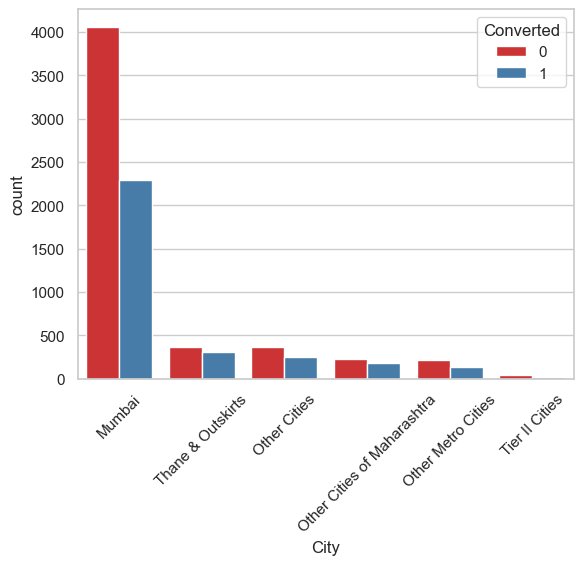

In [190]:
sns.countplot(x = "City", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

Inference:<br>
  -Most leads are from mumbai with around 50% conversion rate.

### x. I agree to pay the amount through cheque

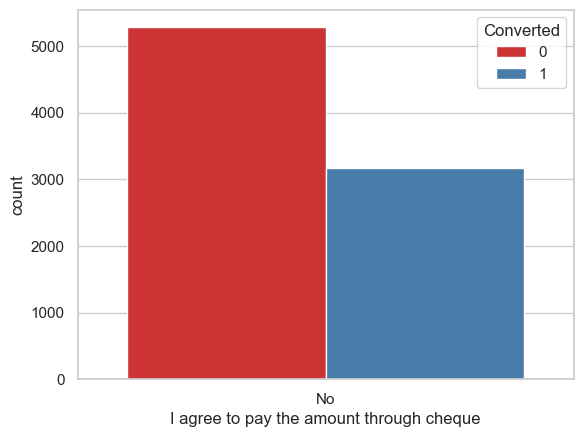

In [191]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads,palette='Set1')
plt.show()

### y. A free copy of Mastering The Interview

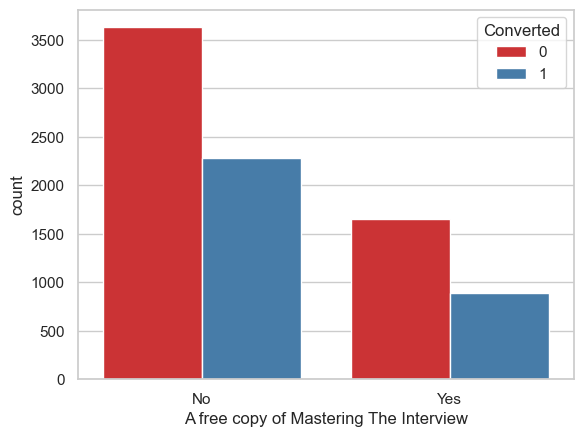

In [192]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads,palette='Set1')
plt.show()

### z. Last Notable Activity

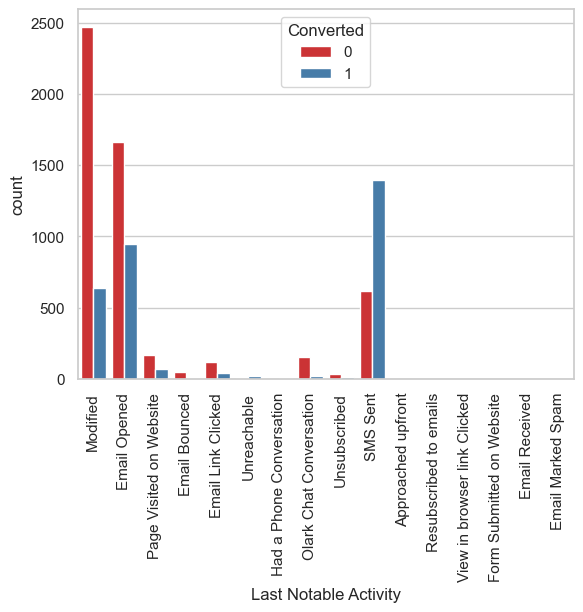

In [193]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [194]:
leads = leads.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [195]:
leads.shape

(8445, 14)

In [196]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      8445 non-null   object 
 1   Lead Origin                      8445 non-null   object 
 2   Lead Source                      8445 non-null   object 
 3   Do Not Email                     8445 non-null   object 
 4   Do Not Call                      8445 non-null   object 
 5   Converted                        8445 non-null   int64  
 6   TotalVisits                      8445 non-null   float64
 7   Total Time Spent on Website      8445 non-null   int64  
 8   Page Views Per Visit             8445 non-null   float64
 9   Last Activity                    8445 non-null   object 
 10  Specialization                   8445 non-null   object 
 11  What is your current occupation  8445 non-null   object 
 12  City                

## Converting Binary variable to 1s and 0s

In [197]:
Binary_vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads[Binary_vars] = leads[Binary_vars].apply(binary_map)

## Creating dummy variables for categorical variables and removing the first one

In [198]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Concatinating the dummy variables to the leads dataframe

In [199]:
leads = pd.concat([leads, dummy_data], axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


## Dropping the columns for which dummy is created

In [200]:
leads= leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

### Adding feature variables to X and target variable to y

In [201]:
X = leads.drop(['Prospect ID','Converted'], axis=1)
y = leads['Converted']

## Splitting data into train-test set

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# working on Training data set

### Scaling the features

In [203]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5279,1,0,-0.314975,-0.504462,-0.037025,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3099,0,0,-0.314975,-0.480383,-0.037025,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
91,0,0,1.396648,1.279233,-0.340229,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1577,0,0,-1.170787,-0.865647,-1.249840,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,0,0,-0.314975,-0.617448,-0.037025,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Feature selection with RFE (limit as 20 variables)

In [205]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [206]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 36),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', False, 21),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 18),
 ('Last Activity_Email Link Clicked', False, 9),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 48),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 42),
 ('Last Activity_SMS Sent', True, 1),
 

### Columns selected by RFE

In [207]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

# Model Building

## Model 1

In [208]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5890
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2431.0
Date:                Fri, 16 Jun 2023   Deviance:                       4862.1
Time:                        06:37:28   Pearson chi2:                 5.81e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3939
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6614      0.875     -0.756      0.449      -2.375       1.053
Do Not Email                                            -1.3365      0.204     -6.555      0.000      -1.736      -0.937
Total Time Spent on Website                              1.0439      0.042     25.148      0.000       0.963       1.125
Lead Origin_Landing Page Submission                     -1.1678      0.134     -8.728      0.000      -1.430      -0.906
Lead Origin_Lead Add Form                                1.3902      0.887      1.568      0.117      -0.348       3.128
Lead Source_Olark Chat                                   1.0009      0.125      8.020      0.000       0.756       1.246
Lead Source_Reference                                    1.7824      0.910      1.959      0.050      -0.001       3.566
Lead Source_Welingak Website                             4.8523      1.346      3.604      0.000       2.213       7.491
Last Activity_Email Opened                               0.8282      0.112      7.391      0.000       0.609       1.048
Last Activity_Olark Chat Conversation                   -0.8405      0.197     -4.262      0.000      -1.227      -0.454
Last Activity_Other_Activity                             2.7275      0.668      4.081      0.000       1.418       4.037
Last Activity_SMS Sent                                   0.9440      0.166      5.680      0.000       0.618       1.270
Last Activity_Unsubscribed                               1.8627      0.469      3.969      0.000       0.943       2.783
Specialization_Others                                   -1.1696      0.128     -9.108      0.000      -1.421      -0.918
What is your current occupation_Housewife               22.7719   1.45e+04      0.002      0.999   -2.83e+04    2.83e+04
What is your current occupation_Student                 -0.0802      0.897     -0.089      0.929      -1.839       1.679
What is your current occupation_Unemployed              -0.3408      0.866     -0.394      0.694      -2.038       1.356
What is your current occupation_Working Professional     2.1005      0.885      2.374      0.018       0.366       3.835
Last Notable Activity_Email Bounced                      1.6287      0.497      3.276      0.001       0.654       2.603
Last Notable Activity_SMS Sent                           1.3053      0.152      8.611      0.000       1.008       1.602
Last Notable Activity_Unreachable                        2.4989      0.547      4.571      0.000       1.427       3.570
========================================================================================================================
"""

In [209]:
# Dropping the column 'What is your current occupation_Housewife' since the p value is very high
col1 = cols.drop('What is your current occupation_Housewife')

## Model 2

In [210]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5891
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2434.7
Date:                Fri, 16 Jun 2023   Deviance:                       4869.3
Time:                        06:43:26   Pearson chi2:                 5.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3931
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7322      0.692      1.058      0.290      -0.624       2.088
Do Not Email                                            -1.3490      0.204     -6.604      0.000      -1.749      -0.949
Total Time Spent on Website                              1.0407      0.041     25.112      0.000       0.959       1.122
Lead Origin_Landing Page Submission                     -1.1637      0.134     -8.704      0.000      -1.426      -0.902
Lead Origin_Lead Add Form                                1.3886      0.886      1.567      0.117      -0.349       3.126
Lead Source_Olark Chat                                   0.9964      0.125      7.987      0.000       0.752       1.241
Lead Source_Reference                                    1.7854      0.910      1.963      0.050       0.002       3.568
Lead Source_Welingak Website                             4.8526      1.346      3.604      0.000       2.214       7.491
Last Activity_Email Opened                               0.8318      0.112      7.433      0.000       0.612       1.051
Last Activity_Olark Chat Conversation                   -0.8451      0.197     -4.284      0.000      -1.232      -0.458
Last Activity_Other_Activity                             2.7304      0.668      4.087      0.000       1.421       4.040
Last Activity_SMS Sent                                   0.9439      0.166      5.678      0.000       0.618       1.270
Last Activity_Unsubscribed                               1.8762      0.469      3.999      0.000       0.957       2.796
Specialization_Others                                   -1.1669      0.128     -9.102      0.000      -1.418      -0.916
What is your current occupation_Student                 -1.4769      0.718     -2.056      0.040      -2.885      -0.069
What is your current occupation_Unemployed              -1.7376      0.679     -2.559      0.011      -3.069      -0.407
What is your current occupation_Working Professional     0.7026      0.702      1.000      0.317      -0.674       2.079
Last Notable Activity_Email Bounced                      1.6423      0.497      3.303      0.001       0.668       2.617
Last Notable Activity_SMS Sent                           1.3068      0.152      8.618      0.000       1.010       1.604
Last Notable Activity_Unreachable                        2.4992      0.547      4.573      0.000       1.428       3.570
========================================================================================================================
"""

In [211]:
## dropping 'What is your current occupation_Working Professional' it has a high p-value
col1 = col1.drop('What is your current occupation_Working Professional')

## Model 3

In [212]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5892
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2435.1
Date:                Fri, 16 Jun 2023   Deviance:                       4870.3
Time:                        06:50:02   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3930
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.3905      0.227      6.117      0.000       0.945       1.836
Do Not Email                                  -1.3526      0.205     -6.611      0.000      -1.754      -0.952
Total Time Spent on Website                    1.0397      0.041     25.101      0.000       0.959       1.121
Lead Origin_Landing Page Submission           -1.1654      0.134     -8.721      0.000      -1.427      -0.903
Lead Origin_Lead Add Form                      1.3865      0.886      1.564      0.118      -0.351       3.124
Lead Source_Olark Chat                         0.9946      0.125      7.975      0.000       0.750       1.239
Lead Source_Reference                          1.7859      0.910      1.963      0.050       0.003       3.569
Lead Source_Welingak Website                   4.8536      1.346      3.605      0.000       2.215       7.492
Last Activity_Email Opened                     0.8341      0.112      7.454      0.000       0.615       1.053
Last Activity_Olark Chat Conversation         -0.8457      0.197     -4.283      0.000      -1.233      -0.459
Last Activity_Other_Activity                   2.7348      0.668      4.096      0.000       1.426       4.043
Last Activity_SMS Sent                         0.9473      0.166      5.701      0.000       0.622       1.273
Last Activity_Unsubscribed                     1.8823      0.469      4.012      0.000       0.963       2.802
Specialization_Others                         -1.1682      0.128     -9.117      0.000      -1.419      -0.917
What is your current occupation_Student       -2.1349      0.299     -7.139      0.000      -2.721      -1.549
What is your current occupation_Unemployed    -2.3961      0.184    -13.031      0.000      -2.756      -2.036
Last Notable Activity_Email Bounced            1.6521      0.497      3.323      0.001       0.678       2.627
Last Notable Activity_SMS Sent                 1.3068      0.152      8.622      0.000       1.010       1.604
Last Notable Activity_Unreachable              2.5023      0.546      4.581      0.000       1.432       3.573
==============================================================================================================
"""

In [213]:
### dropping 'Lead Origin_Lead Add Form' since it has high p value
col1 = col1.drop('Lead Origin_Lead Add Form')

## Model 4

In [214]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5893
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2436.5
Date:                Fri, 16 Jun 2023   Deviance:                       4872.9
Time:                        06:56:42   Pearson chi2:                 5.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.4095      0.227      6.206      0.000       0.964       1.855
Do Not Email                                  -1.3539      0.205     -6.618      0.000      -1.755      -0.953
Total Time Spent on Website                    1.0370      0.041     25.070      0.000       0.956       1.118
Lead Origin_Landing Page Submission           -1.1856      0.133     -8.902      0.000      -1.447      -0.925
Lead Source_Olark Chat                         0.9847      0.124      7.912      0.000       0.741       1.229
Lead Source_Reference                          3.1556      0.245     12.893      0.000       2.676       3.635
Lead Source_Welingak Website                   6.2300      1.019      6.113      0.000       4.233       8.227
Last Activity_Email Opened                     0.8339      0.112      7.459      0.000       0.615       1.053
Last Activity_Olark Chat Conversation         -0.8489      0.197     -4.301      0.000      -1.236      -0.462
Last Activity_Other_Activity                   2.7309      0.668      4.091      0.000       1.422       4.039
Last Activity_SMS Sent                         0.9447      0.166      5.688      0.000       0.619       1.270
Last Activity_Unsubscribed                     1.8806      0.469      4.010      0.000       0.961       2.800
Specialization_Others                         -1.1820      0.128     -9.238      0.000      -1.433      -0.931
What is your current occupation_Student       -2.1337      0.299     -7.134      0.000      -2.720      -1.547
What is your current occupation_Unemployed    -2.3930      0.184    -13.012      0.000      -2.753      -2.033
Last Notable Activity_Email Bounced            1.6526      0.497      3.324      0.001       0.678       2.627
Last Notable Activity_SMS Sent                 1.3100      0.152      8.645      0.000       1.013       1.607
Last Notable Activity_Unreachable              2.4963      0.546      4.570      0.000       1.426       3.567
==============================================================================================================
"""

## Checking for VIF

In [215]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,8.75
9,Last Activity_SMS Sent,5.99
2,Lead Origin_Landing Page Submission,5.09
15,Last Notable Activity_SMS Sent,4.68
11,Specialization_Others,4.12
6,Last Activity_Email Opened,2.74
3,Lead Source_Olark Chat,2.39
7,Last Activity_Olark Chat Conversation,1.91
0,Do Not Email,1.40
1,Total Time Spent on Website,1.32


In [216]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

## Model 5

In [217]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5894
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.7
Date:                Fri, 16 Jun 2023   Deviance:                       5101.4
Time:                        07:06:18   Pearson chi2:                 5.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3688
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.6637      0.146     -4.549      0.000      -0.950      -0.378
Do Not Email                               -1.4113      0.200     -7.071      0.000      -1.803      -1.020
Total Time Spent on Website                 1.0472      0.041     25.841      0.000       0.968       1.127
Lead Origin_Landing Page Submission        -1.2913      0.129    -10.025      0.000      -1.544      -1.039
Lead Source_Olark Chat                      0.9895      0.123      8.048      0.000       0.749       1.230
Lead Source_Reference                       3.3346      0.240     13.894      0.000       2.864       3.805
Lead Source_Welingak Website                6.2302      1.019      6.112      0.000       4.232       8.228
Last Activity_Email Opened                  0.8190      0.108      7.591      0.000       0.608       1.030
Last Activity_Olark Chat Conversation      -0.8471      0.193     -4.391      0.000      -1.225      -0.469
Last Activity_Other_Activity                2.8573      0.636      4.493      0.000       1.611       4.104
Last Activity_SMS Sent                      0.8834      0.162      5.461      0.000       0.566       1.200
Last Activity_Unsubscribed                  1.8086      0.459      3.944      0.000       0.910       2.707
Specialization_Others                      -1.4690      0.125    -11.742      0.000      -1.714      -1.224
What is your current occupation_Student     0.1057      0.246      0.430      0.667      -0.376       0.587
Last Notable Activity_Email Bounced         1.7002      0.500      3.401      0.001       0.721       2.680
Last Notable Activity_SMS Sent              1.3483      0.149      9.075      0.000       1.057       1.640
Last Notable Activity_Unreachable           2.5032      0.537      4.659      0.000       1.450       3.556
===========================================================================================================
"""

In [218]:
### dropping 'What is your current occupation_Student' since it has high p value
col1 = col1.drop('What is your current occupation_Student')

## Model 6

In [219]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.8
Date:                Fri, 16 Jun 2023   Deviance:                       5101.6
Time:                        07:09:50   Pearson chi2:                 5.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3688
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6621      0.146     -4.539      0.000      -0.948      -0.376
Do Not Email                             -1.4112      0.200     -7.069      0.000      -1.802      -1.020
Total Time Spent on Website               1.0473      0.041     25.842      0.000       0.968       1.127
Lead Origin_Landing Page Submission      -1.2904      0.129    -10.017      0.000      -1.543      -1.038
Lead Source_Olark Chat                    0.9911      0.123      8.064      0.000       0.750       1.232
Lead Source_Reference                     3.3366      0.240     13.906      0.000       2.866       3.807
Lead Source_Welingak Website              6.2294      1.019      6.112      0.000       4.232       8.227
Last Activity_Email Opened                0.8192      0.108      7.593      0.000       0.608       1.031
Last Activity_Olark Chat Conversation    -0.8458      0.193     -4.385      0.000      -1.224      -0.468
Last Activity_Other_Activity              2.8548      0.636      4.490      0.000       1.608       4.101
Last Activity_SMS Sent                    0.8814      0.162      5.451      0.000       0.564       1.198
Last Activity_Unsubscribed                1.8060      0.459      3.938      0.000       0.907       2.705
Specialization_Others                    -1.4689      0.125    -11.738      0.000      -1.714      -1.224
Last Notable Activity_Email Bounced       1.7032      0.500      3.406      0.001       0.723       2.683
Last Notable Activity_SMS Sent            1.3488      0.149      9.079      0.000       1.058       1.640
Last Notable Activity_Unreachable         2.5008      0.537      4.654      0.000       1.448       3.554
=========================================================================================================
"""

In [220]:
# Checking for VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,5.80
13,Last Notable Activity_SMS Sent,4.67
2,Lead Origin_Landing Page Submission,2.70
11,Specialization_Others,2.57
6,Last Activity_Email Opened,2.45
3,Lead Source_Olark Chat,2.33
7,Last Activity_Olark Chat Conversation,1.85
0,Do Not Email,1.38
1,Total Time Spent on Website,1.32
4,Lead Source_Reference,1.27


In [221]:
# Dropping the column  'Last Activity_SMS Sent' because it has high VIF
col1 = col1.drop('Last Activity_SMS Sent')

## Model 7

In [222]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.4
Date:                Fri, 16 Jun 2023   Deviance:                       5130.7
Time:                        07:14:22   Pearson chi2:                 5.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3657
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4084      0.136     -3.009      0.003      -0.675      -0.142
Do Not Email                             -1.4525      0.198     -7.353      0.000      -1.840      -1.065
Total Time Spent on Website               1.0460      0.040     25.946      0.000       0.967       1.125
Lead Origin_Landing Page Submission      -1.2789      0.128     -9.989      0.000      -1.530      -1.028
Lead Source_Olark Chat                    1.0007      0.123      8.166      0.000       0.761       1.241
Lead Source_Reference                     3.4156      0.241     14.191      0.000       2.944       3.887
Lead Source_Welingak Website              6.3704      1.021      6.237      0.000       4.369       8.372
Last Activity_Email Opened                0.5520      0.093      5.951      0.000       0.370       0.734
Last Activity_Olark Chat Conversation    -1.1150      0.185     -6.035      0.000      -1.477      -0.753
Last Activity_Other_Activity              2.5932      0.634      4.089      0.000       1.350       3.836
Last Activity_Unsubscribed                1.5807      0.455      3.474      0.001       0.689       2.472
Specialization_Others                    -1.4589      0.125    -11.716      0.000      -1.703      -1.215
Last Notable Activity_Email Bounced       1.4783      0.497      2.976      0.003       0.505       2.452
Last Notable Activity_SMS Sent            1.9652      0.101     19.379      0.000       1.766       2.164
Last Notable Activity_Unreachable         2.2357      0.534      4.184      0.000       1.188       3.283
=========================================================================================================
"""

In [223]:
# Checking for VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.39
3,Lead Source_Olark Chat,2.29
2,Lead Origin_Landing Page Submission,2.28
6,Last Activity_Email Opened,2.17
12,Last Notable Activity_SMS Sent,1.77
7,Last Activity_Olark Chat Conversation,1.75
0,Do Not Email,1.37
1,Total Time Spent on Website,1.31
4,Lead Source_Reference,1.21
11,Last Notable Activity_Email Bounced,1.11


## Since all the p-values are almost zero and all the VIFs are less than 5 Model 7 is our final model with 14 variables

## Making predictions on Train set

In [224]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5279    0.005903
3099    0.444076
91      0.922897
1577    0.934241
487     0.123346
758     0.362561
7260    0.157555
7538    0.666182
2404    0.121244
8190    0.931376
dtype: float64

In [225]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00590342, 0.44407565, 0.92289667, 0.93424068, 0.12334552,
       0.36256088, 0.15755525, 0.66618219, 0.12124389, 0.93137631])

## Now getting a dataframe which contains predicted probabilities, converted flag and <br>Prospect id

In [226]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.005903,5279
1,0,0.444076,3099
2,1,0.922897,91
3,1,0.934241,1577
4,0,0.123346,487


## Taking an arbitrary cutoff of 0.5 and evaluating the metrics

In [227]:
# Creating the new column "predicted" and entering as 0 if probability is less than or equal to 0.5, and 1 if more than 0.5

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.005903,5279,0
1,0,0.444076,3099,0
2,1,0.922897,91,1
3,1,0.934241,1577,1
4,0,0.123346,487,0


## Creating Confusion matrix

In [228]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3225  469]
 [ 710 1507]]


## To calculate all metrics

In [229]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [231]:
## Calculating Accuracy, Sensitivity, False positive Rate, Positive Predicted Value, Negative predicted value

print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))

Accuracy : 0.8005413635594654
Sensitivity :  0.6797474064050518
Specificity :  0.8730373578776394
False Positive Rate : 0.12696264212236058
Positive Predictive Value : 0.7626518218623481
Negative predictive value : 0.8195679796696315


#### So now we have specificity 87.3% which is good but specificity is 67.9%. So we need to optimise the cutoff value.
#### will now use ROC curve which is a trade of between sensitivity and specificity.

In [232]:
# ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

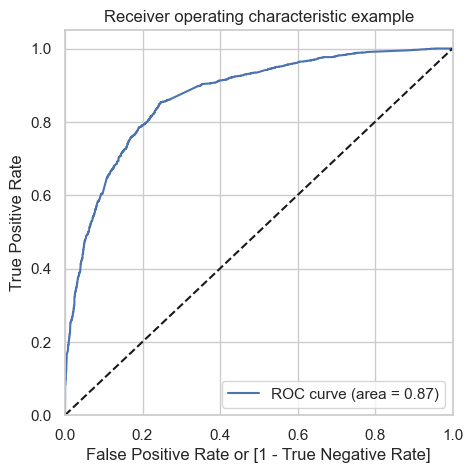

In [233]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since area under the curve is 0.87, this model is good

## Now getting optimal cutoff by creating trade of between accuracy,sensitivity and specificity

In [234]:
# creating columns with different probability cutoffs (0.1 to 0.9)
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005903,5279,0,1,0,0,0,0,0,0,0,0,0
1,0,0.444076,3099,0,1,1,1,1,1,0,0,0,0,0
2,1,0.922897,91,1,1,1,1,1,1,1,1,1,1,1
3,1,0.934241,1577,1,1,1,1,1,1,1,1,1,1,1
4,0,0.123346,487,0,1,1,0,0,0,0,0,0,0,0


In [235]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375063  1.000000  0.000000
0.1   0.1  0.574184  0.976545  0.332702
0.2   0.2  0.728472  0.905728  0.622090
0.3   0.3  0.790729  0.832657  0.765566
0.4   0.4  0.799695  0.767704  0.818896
0.5   0.5  0.800541  0.679747  0.873037
0.6   0.6  0.785146  0.556608  0.922306
0.7   0.7  0.770936  0.473162  0.949648
0.8   0.8  0.740991  0.362652  0.968056
0.9   0.9  0.698359  0.214705  0.988630


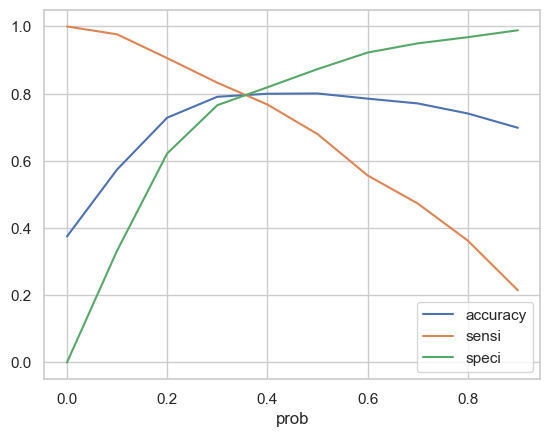

In [237]:
# ploting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

So the common point is between 0.33 to 0.4, will plot it for only the probability between 0.35 to 0.4

In [243]:
# creating columns with different probability cutoffs (0.33 to 0.4)
numbers = [0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,...,0.7,0.8,0.9,0.35,0.36,0.37,0.38,0.39,0.33,0.34
0,0,0.005903,5279,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.444076,3099,0,1,1,1,1,1,0,...,0,0,0,1,1,1,1,1,1,1
2,1,0.922897,91,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,0.934241,1577,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0.123346,487,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df2 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df2.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df2)

      prob  accuracy     sensi     speci
0.33  0.33  0.791068  0.815968  0.776123
0.34  0.34  0.791744  0.811006  0.780184
0.35  0.35  0.791744  0.806044  0.783162
0.36  0.36  0.793267  0.798376  0.790200
0.37  0.37  0.795804  0.791159  0.798592
0.38  0.38  0.799357  0.784844  0.808067
0.39  0.39  0.799019  0.775823  0.812940
0.40  0.40  0.799695  0.767704  0.818896


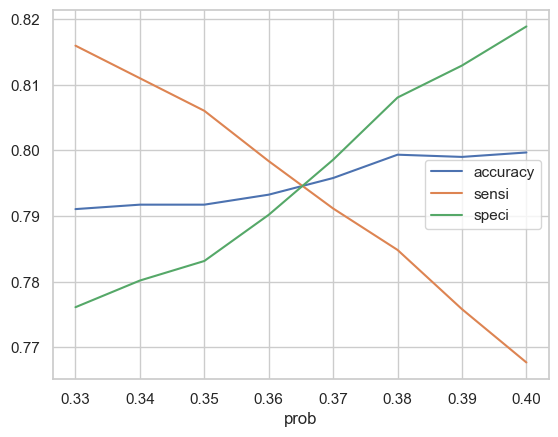

In [245]:
# ploting accuracy sensitivity and specificity for various probabilities.
cutoff_df2.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.365 is the optimum point to take it as a cutoff probability

In [246]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.365 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,...,0.8,0.9,0.35,0.36,0.37,0.38,0.39,0.33,0.34,final_predicted
0,0,0.005903,5279,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.444076,3099,0,1,1,1,1,1,0,...,0,0,1,1,1,1,1,1,1,1
2,1,0.922897,91,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,0.934241,1577,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0.123346,487,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
Final_predicted_df=y_train_pred_final[["Converted","final_predicted","Prospect ID"]]

In [248]:
Final_predicted_df

,Converted,final_predicted,Prospect ID
0,0,0,5279
1,0,1,3099
2,1,1,91
3,1,1,1577
4,0,0,487
...,...,...,...
5906,0,1,403
5907,0,0,90
5908,1,1,8805
5909,1,1,7595


### Creating the Confusion matrix again and checking the metrics

In [250]:
from sklearn import metrics

# Confusion matrix 
confusion2 = metrics.confusion_matrix(Final_predicted_df.Converted, Final_predicted_df.final_predicted )
print(confusion2)

[[2934  760]
 [ 456 1761]]


In [251]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [252]:
## Calculating Accuracy, Sensitivity, False positive Rate, Positive Predicted Value, Negative predicted value

print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("Sensitivity : ",TP / float(TP+FN))
print("Specificity : ",TN / float(TN+FP))
print("False Positive Rate :",FP/ float(TN+FP))
print("Positive Predictive Value :",TP / float(TP+FP))
print ("Negative predictive value :",TN / float(TN+ FN))

Accuracy : 0.8005413635594654
Sensitivity :  0.7943166441136671
Specificity :  0.7942609637249594
False Positive Rate : 0.20573903627504062
Positive Predictive Value : 0.6985323284410948
Negative predictive value : 0.8654867256637168


So here sensitivity, Specificity and Accuracy are nearly the same and is around 79% to 80% which is goood.

## Making predictions on the TEST data

In [253]:
# scaling
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [256]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.shape

(2534, 14)

In [257]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1926    0.559434
5654    0.193385
1209    0.043166
5234    0.227377
8497    0.163296
1918    0.083247
7405    0.409023
6561    0.038255
5492    0.865973
7851    0.919224
dtype: float64

In [258]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [259]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [260]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [261]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [262]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [263]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,1926,0.559434
1,0,5654,0.193385
2,0,1209,0.043166
3,0,5234,0.227377
4,0,8497,0.163296


In [264]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [265]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [266]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,1926,1,0.559434
1,5654,0,0.193385
2,1209,0,0.043166
3,5234,0,0.227377
4,8497,0,0.163296


In [267]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.365 else 0)

In [268]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,1926,1,0.559434,1
1,5654,0,0.193385,0
2,1209,0,0.043166,0
3,5234,0,0.227377,0
4,8497,0,0.163296,0


In [269]:
# Making the confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1264,  322],
       [ 173,  775]], dtype=int64)

In [270]:
# Checking all the metrics

TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Accuracy : 0.8046566692975533
Sensitivity : 0.8175105485232067
Specificity : 0.7969735182849937


## Results are fair enough

## Assigning lead score to test data

In [271]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,1926,1,0.559434,1,56
1,5654,0,0.193385,0,19
2,1209,0,0.043166,0,4
3,5234,0,0.227377,0,23
4,8497,0,0.163296,0,16


# RESULTS:

## 1. Values of metrics obtained in Train and Test set

### Train data:<br>
###### Sensitivity :79.4%
###### Specificity :79.4%
###### Accuracy  :80.0%

### Test data:<br>
###### Sensitivity :81.8%
###### Specificity :79.7%
###### Accuracy  : 80.5%

### Thus Achieved our goal the conversion rate is to be around 80%

## 2. Finding out the leads who are to be contacted:

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [272]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
8,5492,1,0.865973,1,87
9,7851,1,0.919224,1,92
15,5882,1,0.984476,1,98
22,4155,1,0.886909,1,89
24,1374,1,0.904215,1,90
...,...,...,...,...,...
2480,2042,1,0.983158,1,98
2483,6179,1,0.968848,1,97
2493,7931,1,0.946016,1,95
2497,1780,1,0.998751,1,100


## 2. Finding out important features of our model:

In [273]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website             6.370434
Lead Source_Reference                    3.415614
Last Activity_Other_Activity             2.593184
Last Notable Activity_Unreachable        2.235664
Last Notable Activity_SMS Sent           1.965153
Last Activity_Unsubscribed               1.580658
Last Notable Activity_Email Bounced      1.478256
Total Time Spent on Website              1.045983
Lead Source_Olark Chat                   1.000745
Last Activity_Email Opened               0.552007
const                                   -0.408436
Last Activity_Olark Chat Conversation   -1.115020
Lead Origin_Landing Page Submission     -1.278882
Do Not Email                            -1.452472
Specialization_Others                   -1.458854
dtype: float64

## Recommendations

### 1. Company should make calls to leads coming from "Lead Source_Welingak Website ","Lead Source_Reference","Last Activity_Other_Activity","Last Notable Activity_Unreachable ","Last Notable Activity_SMS Sent ","Last Activity_Unsubscribed","Last Notable Activity_Email Bounced" and "Total Time Spent on Website".
### 2. Company should not make calls to leads coming from "Lead Source_Olark Chat","Last Activity_Email Opened","Last Activity_Olark Chat Conversation","Lead Origin_Landing Page Submission","Do Not Email" and "Specialization_Others ".